In [2]:
!python -m pip install pandas opencv-python scikit-image ipyplot

     |████████████████████████████████| 11.5 MB 650 kB/s eta 0:00:01
     |████████████████████████████████| 60.3 MB 64 kB/s  eta 0:00:01     |████████████████████████████▏   | 53.0 MB 1.6 MB/s eta 0:00:05
  Using cached scikit_image-0.18.3-cp39-cp39-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (34.6 MB)
     |████████████████████████████████| 503 kB 1.1 MB/s eta 0:00:01
  Using cached networkx-2.6.3-py3-none-any.whl (1.9 MB)
  Using cached PyWavelets-1.1.1-cp39-cp39-manylinux1_x86_64.whl (4.3 MB)
  Using cached scipy-1.7.1-cp39-cp39-manylinux_2_5_x86_64.manylinux1_x86_64.whl (28.5 MB)
     |████████████████████████████████| 3.3 MB 2.7 MB/s eta 0:00:01
     |████████████████████████████████| 175 kB 1.5 MB/s eta 0:00:01
  Using cached matplotlib-3.4.3-cp39-cp39-manylinux1_x86_64.whl (10.3 MB)
  Using cached kiwisolver-1.3.2-cp39-cp39-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (1.6 MB)
You should consider upgrading via the '/home/renesat/0. PARA/1. Projects/Ecodrone/NN/.venv/bin/py

In [15]:
import pandas as pd
import cv2
from skimage import io
import ipyplot
import json
from PIL import Image, ImageDraw
import numpy as np
from pathlib import Path

In [16]:
data = pd.read_csv('../data/raw/train-all.csv', sep=",")

In [35]:
data['filename'] = data['INPUT:image'].dropna().apply(lambda x: x.split("/")[-1])

In [36]:
data.head()

,Unnamed: 0,INPUT:image,OUTPUT:path,rle,filename
0,0,https://storage.yandexcloud.net/garbage-images...,"{""shape"":""polygon""\,""points"":[{""left"":0.406846...",1942571 3 1945269 9 1947967 15 1950665 21 1953...,DJI_0037-400.jpg
1,1,https://storage.yandexcloud.net/garbage-images...,"{""shape"":""polygon""\,""points"":[{""left"":0.530583...",1504852 3 1507554 9 1510257 15 1512959 21 1515...,DJI_0080-1300.jpg
2,2,https://storage.yandexcloud.net/garbage-images...,"{""shape"":""polygon""\,""points"":[{""left"":0.120259...",3120742 2 3123444 6 3126147 10 3128850 13 3131...,DJI_0075-1000.jpg
3,3,https://storage.yandexcloud.net/garbage-images...,"{""shape"":""polygon""\,""points"":[{""left"":0.297034...",841684 2 844385 7 847086 12 849787 17 852488 2...,DJI_0018-1075.jpg
4,4,https://storage.yandexcloud.net/garbage-images...,"{""shape"":""polygon""\,""points"":[{""left"":0.719647...",36947 5 39641 10 42335 12 45030 13 47724 15 50...,DJI_0071-2675.jpg


In [34]:
data["INPUT:image"][0]

'https://storage.yandexcloud.net/garbage-images/DJI_0037-400.jpg'

In [38]:
img_num = 3150

In [39]:
image = io.imread(Path("..//data/raw/train/") / data["filename"][img_num] )

In [40]:
height, width, _ = image.shape
json.loads('[' + data["OUTPUT:path"][img_num].replace("\\", "") + ']')

[{'shape': 'polygon',
  'points': [{'left': 0.3852875305562098, 'top': 0.9040430266212466},
   {'left': 0.40751832863765464, 'top': 0.9155776907135053},
   {'left': 0.41956001093177064, 'top': 0.8727346526565452},
   {'left': 0.4177074444249836, 'top': 0.836482851223733},
   {'left': 0.39640292959693224, 'top': 0.8447218970039176},
   {'left': 0.37880354778245506, 'top': 0.8579043702522129},
   {'left': 0.37417213151548734, 'top': 0.8793258892806929}]}]

In [41]:
polygon = []
for poly in json.loads('[' + data["OUTPUT:path"][img_num].replace("\\", "") + ']'):
    for pair in poly["points"]:
        polygon.append((pair["top"] * height, pair["left"] * width))
img = Image.new('L', image.shape[:2], 0)
ImageDraw.Draw(img).polygon(polygon, outline=1, fill=1)
mask = np.array(img).T


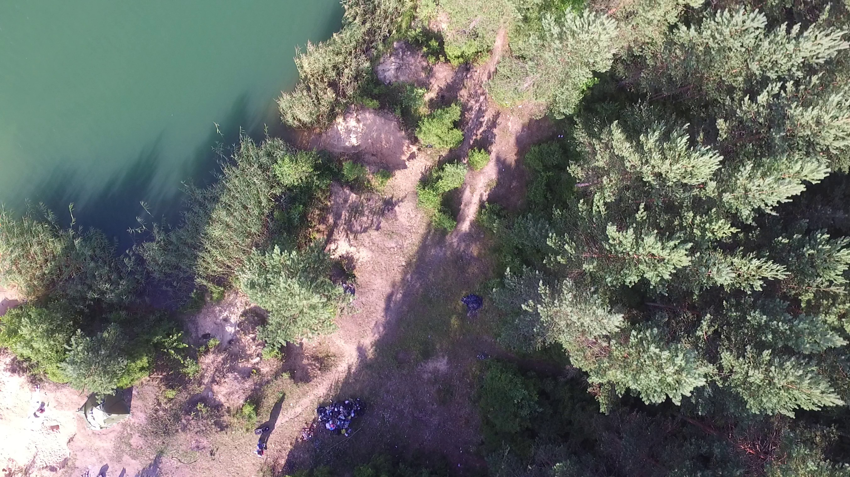
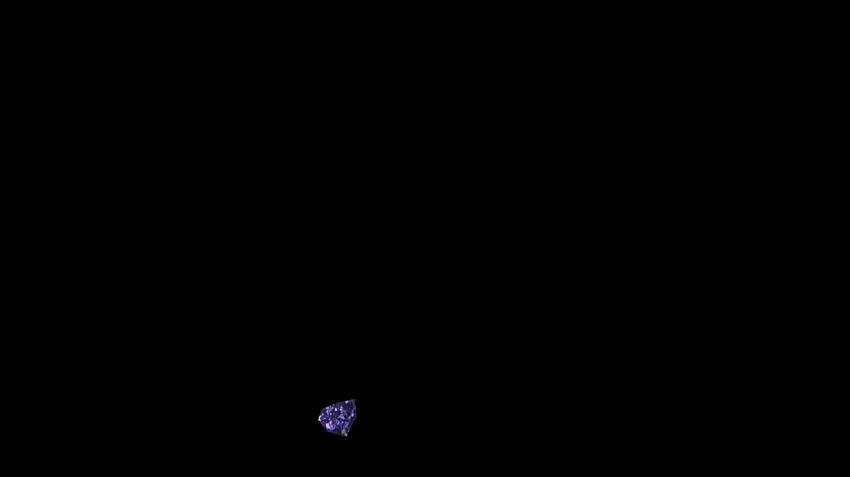


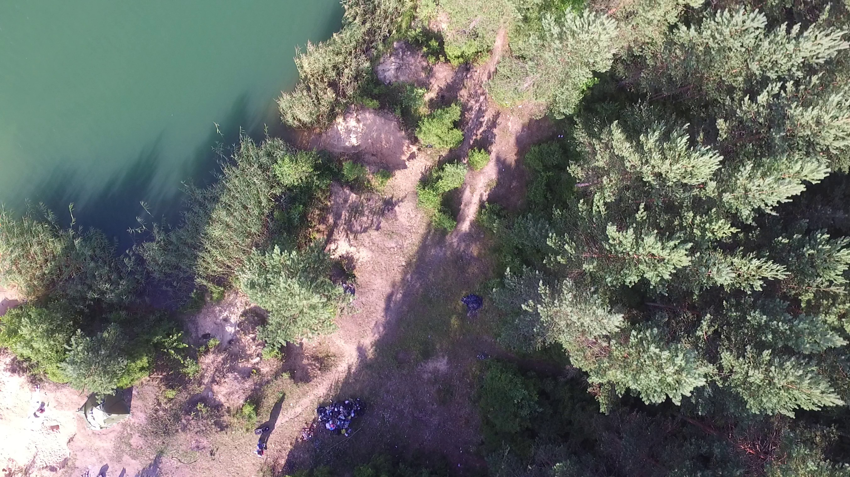
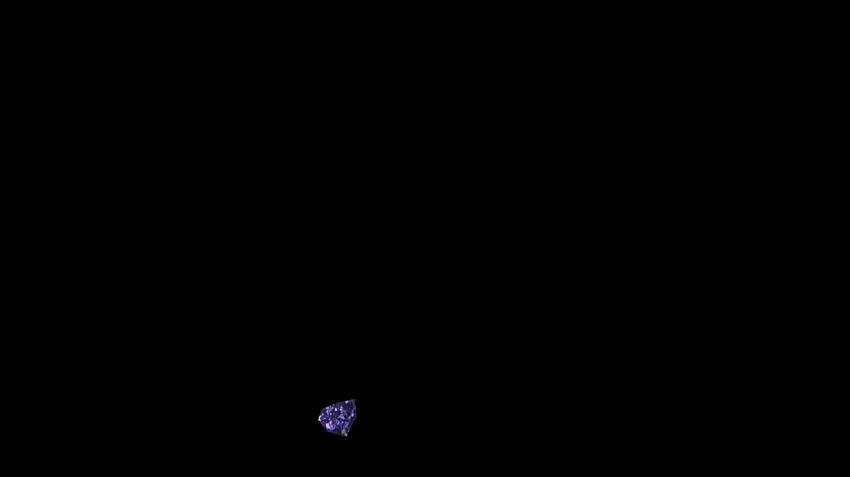

In [42]:
ipyplot.plot_images([image, cv2.bitwise_and(image, image, mask = mask)], max_images=20, img_width=850)